In [1]:
import numpy as np 
import matplotlib.pyplot as plt
% matplotlib inline


class LinearRegression(object):
    """ Initially this is a linear regression with theta1 and theta0 as parameters and using 
        batch gradient descent.
    """
     
    def __init__(self):
        self.theta1 = 0
        
    def train(self, x, y, epochs, learning_rate):
        for _ in range(0, epochs):
            average_full_batch_loss = 0.5*avg((np.dot(x, theta) - y)**2)
            average_full_batch_partial_derrivitives = avg(np.dot(x, theta)- y)
            theta = theta + learning_rate * average_full_batch_partial_derriviteis
        self.theta = theta
        
    def validate(self, x, y):
        predicted_y = np.dot(x, self.theta)
        accuracy_score = sqrt(avg((y- predicted_y)**2)) # Root Mean Square Error (RMSE)
        return predicted_y, accuracy_score
        
    def predict(self, x):
        predicted_y = np.dot(x, self.theta)
        return predicted_y

In [2]:
linear_regression = LinearRegression()

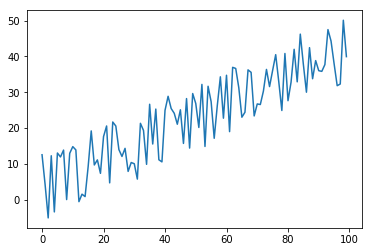

In [3]:
x = np.arange(100)
delta = np.random.uniform(-10,10, size=(100,))
y = .4 * x +3 + delta
plt.plot(x,y)

In [4]:
linear_regression.train(x, y, epochs=5, learning_rate=0.01)

NameError: name 'avg' is not defined